<a href="https://colab.research.google.com/github/jwalor/mineriaweb/blob/main/Proyecto_TopicModelingEducacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO: 
# **TOPIC MODELING EN EDUCACIÓN**

In [1]:
#----------------------------------------------------------------------------------
# Fecha de Creación: 2020/10/XX
# Autores:
# - Jorge Alor Morales 
# - Robert Alvarado
# - Milton Carhuas Ñañez
#----------------------------------------------------------------------------------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

##### Instalación de Librerías

In [ ]:
#!pip install tweepy
#!pip install gensim

##### Importación de Librerías

In [ ]:
# Libreria para conexion al API (intefaz) de Tweeter
import tweepy
import pandas as pd
import os
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk
import re
import string
from gensim.models import word2vec
import numpy as np
import matplotlib.pyplot as plt
import gensim
from multiprocessing import cpu_count
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.utils import simple_preprocess
from sklearn.preprocessing import StandardScaler
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
pd.set_option('display.max_colwidth', 100)

# **1. ADQUISICION DE LOS DATOS**

In [ ]:
# Autenticacion obtenida de API Twitter de cuenta @MiltonC78417755
# https://developer.twitter.com

api_k = 'lHSqiXqZhyiYJfHD6A2VS348o'
api_secret = '2h7DmSNqWqfL36JsmZgmzPPa5lMbLxyO8k67EwmfXXFPGOFcV9'

access_token = '1013100589406924800-8vSCqwhUzqhEP2BB1xSERWEZAUlGyg'
access_token_secret = '6AlrF9Nl3hqonY3cSQw1g5ASmaLabXwAowpRqIHUaElmD'

In [ ]:
auth = tweepy.OAuthHandler(api_k, api_secret)

In [ ]:
auth.set_access_token(access_token, access_token_secret)

In [ ]:
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
#api = tweepy.API(auth)

In [ ]:
query_base = "covid OR COVID OR coronavirus OR covid-19 OR pandemia OR sars-cov2"
query = query_base + " -filter:retweets"
date_since = "2020-01-01"

In [ ]:
print(query_base)
print(query)
print(date_since)

covid OR COVID OR coronavirus OR covid-19 OR pandemia OR sars-cov2
covid OR COVID OR coronavirus OR covid-19 OR pandemia OR sars-cov2 -filter:retweets
2020-01-01


### Extraccion de Datos Basica

In [ ]:
#%time
#Cursor_tweets = tweepy.Cursor(api.search, q=query, tweet_mode='extended', lang='es', since=date_since).items(1000)

In [ ]:
#type(Cursor_tweets)

tweepy.cursor.ItemIterator

In [ ]:
# Recolectando los datos del tweet
#list_tweets = [[tweet.id, tweet.user.id, tweet.user.screen_name, tweet.user.name, tweet.user.created_at, tweet.full_text] for tweet in Cursor_tweets]

In [ ]:
#type(list_tweets)

list

In [ ]:
#list_tweets[1]

[147797418,
 'vmercedesinfo',
 'Villa Mercedes Info',
 datetime.datetime(2010, 5, 25, 2, 30, 44),
 '#VMI San Luis registró 276 casos positivos para COVID-19 y 6 fallecidos; 177 pertenecen a Villa Mercedes #SanLuis  https://t.co/oua6CccpR2']

In [ ]:
#len(list_tweets)

2000

In [ ]:
#df_tweets = pd.DataFrame(data=list_tweets, columns = ['id', 'usuario', 'nombre', 'fec_creacion', 'tweet'])

In [ ]:
#df_tweets.head(5)

,id,usuario,nombre,fec_creacion,tweet
0,921863915469987841,Gerardo83742901,Gerardo Martinez Her,2017-10-21 22:20:59,@brozoxmiswebs El presidente que se deje de pe...
1,241798233,pctenlanoticia,PCT en la Noticia,2011-01-23 04:51:39,La leche materna mata a la mayoría de las cepa...
2,1043660368088915968,CarmenCasal16,Carmen Casal,2018-09-23 00:36:36,Sostuvo Ministro Turismo Cuba @JuannCarlosGG r...
3,1151975763597516800,Anaeu34529596,Aneu 🇪🇦☔,2019-07-18 22:03:19,@morgan_covid Hace meses que los centros de sa...
4,733245099979726848,Oespinar1,Oscar Espinar,2016-05-19 10:37:09,@PrevencinDocen1 @jljcolorado @FloriVilla3 @La...


In [ ]:
# Guardando el CSV
#df_tweets.to_csv('tweets_acachay.csv', index=False, sep='\t', encoding='utf-8')
#df_tweets.to_csv('tweets_vubaldo.csv', index=False, sep='|', encoding='utf-8')

In [ ]:
# Guardando el Excel
#df_tweets.to_excel('tweets_acachay.xlsx', sheet_name='tweets', index=False)
#df_tweets.to_csv('tweets_vubaldo.csv', index=False, sep='|', encoding='utf-8')

### Extraccion de Datos con Timer

In [ ]:
# Inicio: 10:15 AM
# Fin: 13:15
# 
# Inicio: 19:30 PM
# Fin: 00:30 AM
# 286,000
%time
import time

list_tweets2 = []
c = 0

for status in tweepy.Cursor(
                            api.search, 
                            q=query,
                            tweet_mode='extended',
                            lang='es',
                            since=date_since,
                            count=10000,
                            rpp=10000,
                            monitor_rate_limit=True,
                            wait_on_rate_limit=True,
                            wait_on_rate_limit_notify=True,
                            retry_count=5,
                            retry_delay=5
                            ).items():
    try:
        list_tweets2.append([status.id, status.user.id, status.user.screen_name, status.user.name, status.user.created_at, status.full_text])        
        print(len(list_tweets2))

    except Exception as e:
        print(e)        

        c += 1
        
        if c % 100 == 0:
            time.sleep(5)

Streaming output truncated to the last 5000 lines.
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
12970
12971
12972
12973
12974
12975
12976
12977
12978
12979
12980
12981
12982
12983
12984
12985
12986
12987
12988
12989
12990
12991
12992
12993
12994
12995
12996
12997
12998
12999
13000
13001
13002
13003
13004
13005
13006
13007
13008
13009
13010
13011
13012
13013
13014
13015
13016
13017
13018
13019
13020
13021
13022
13023
13024
13025
13026
13027
13028
13029
13030
13031
13032
13033
13034
13035
13036
13037
13038
13039
13040
13041
1

Rate limit reached. Sleeping for: 847


Streaming output truncated to the last 5000 lines.
30860
30861
30862
30863
30864
30865
30866
30867
30868
30869
30870
30871
30872
30873
30874
30875
30876
30877
30878
30879
30880
30881
30882
30883
30884
30885
30886
30887
30888
30889
30890
30891
30892
30893
30894
30895
30896
30897
30898
30899
30900
30901
30902
30903
30904
30905
30906
30907
30908
30909
30910
30911
30912
30913
30914
30915
30916
30917
30918
30919
30920
30921
30922
30923
30924
30925
30926
30927
30928
30929
30930
30931
30932
30933
30934
30935
30936
30937
30938
30939
30940
30941
30942
30943
30944
30945
30946
30947
30948
30949
30950
30951
30952
30953
30954
30955
30956
30957
30958
30959
30960
30961
30962
30963
30964
30965
30966
30967
30968
30969
30970
30971
30972
30973
30974
30975
30976
30977
30978
30979
30980
30981
30982
30983
30984
30985
30986
30987
30988
30989
30990
30991
30992
30993
30994
30995
30996
30997
30998
30999
31000
31001
31002
31003
31004
31005
31006
31007
31008
31009
31010
31011
31012
31013
31014
31015
31016
31017
3

Rate limit reached. Sleeping for: 847


Streaming output truncated to the last 5000 lines.
48857
48858
48859
48860
48861
48862
48863
48864
48865
48866
48867
48868
48869
48870
48871
48872
48873
48874
48875
48876
48877
48878
48879
48880
48881
48882
48883
48884
48885
48886
48887
48888
48889
48890
48891
48892
48893
48894
48895
48896
48897
48898
48899
48900
48901
48902
48903
48904
48905
48906
48907
48908
48909
48910
48911
48912
48913
48914
48915
48916
48917
48918
48919
48920
48921
48922
48923
48924
48925
48926
48927
48928
48929
48930
48931
48932
48933
48934
48935
48936
48937
48938
48939
48940
48941
48942
48943
48944
48945
48946
48947
48948
48949
48950
48951
48952
48953
48954
48955
48956
48957
48958
48959
48960
48961
48962
48963
48964
48965
48966
48967
48968
48969
48970
48971
48972
48973
48974
48975
48976
48977
48978
48979
48980
48981
48982
48983
48984
48985
48986
48987
48988
48989
48990
48991
48992
48993
48994
48995
48996
48997
48998
48999
49000
49001
49002
49003
49004
49005
49006
49007
49008
49009
49010
49011
49012
49013
49014
4

Rate limit reached. Sleeping for: 848


Streaming output truncated to the last 5000 lines.
66832
66833
66834
66835
66836
66837
66838
66839
66840
66841
66842
66843
66844
66845
66846
66847
66848
66849
66850
66851
66852
66853
66854
66855
66856
66857
66858
66859
66860
66861
66862
66863
66864
66865
66866
66867
66868
66869
66870
66871
66872
66873
66874
66875
66876
66877
66878
66879
66880
66881
66882
66883
66884
66885
66886
66887
66888
66889
66890
66891
66892
66893
66894
66895
66896
66897
66898
66899
66900
66901
66902
66903
66904
66905
66906
66907
66908
66909
66910
66911
66912
66913
66914
66915
66916
66917
66918
66919
66920
66921
66922
66923
66924
66925
66926
66927
66928
66929
66930
66931
66932
66933
66934
66935
66936
66937
66938
66939
66940
66941
66942
66943
66944
66945
66946
66947
66948
66949
66950
66951
66952
66953
66954
66955
66956
66957
66958
66959
66960
66961
66962
66963
66964
66965
66966
66967
66968
66969
66970
66971
66972
66973
66974
66975
66976
66977
66978
66979
66980
66981
66982
66983
66984
66985
66986
66987
66988
66989
6

Rate limit reached. Sleeping for: 846


Streaming output truncated to the last 5000 lines.
84818
84819
84820
84821
84822
84823
84824
84825
84826
84827
84828
84829
84830
84831
84832
84833
84834
84835
84836
84837
84838
84839
84840
84841
84842
84843
84844
84845
84846
84847
84848
84849
84850
84851
84852
84853
84854
84855
84856
84857
84858
84859
84860
84861
84862
84863
84864
84865
84866
84867
84868
84869
84870
84871
84872
84873
84874
84875
84876
84877
84878
84879
84880
84881
84882
84883
84884
84885
84886
84887
84888
84889
84890
84891
84892
84893
84894
84895
84896
84897
84898
84899
84900
84901
84902
84903
84904
84905
84906
84907
84908
84909
84910
84911
84912
84913
84914
84915
84916
84917
84918
84919
84920
84921
84922
84923
84924
84925
84926
84927
84928
84929
84930
84931
84932
84933
84934
84935
84936
84937
84938
84939
84940
84941
84942
84943
84944
84945
84946
84947
84948
84949
84950
84951
84952
84953
84954
84955
84956
84957
84958
84959
84960
84961
84962
84963
84964
84965
84966
84967
84968
84969
84970
84971
84972
84973
84974
84975
8

Rate limit reached. Sleeping for: 847


Streaming output truncated to the last 5000 lines.
102798
102799
102800
102801
102802
102803
102804
102805
102806
102807
102808
102809
102810
102811
102812
102813
102814
102815
102816
102817
102818
102819
102820
102821
102822
102823
102824
102825
102826
102827
102828
102829
102830
102831
102832
102833
102834
102835
102836
102837
102838
102839
102840
102841
102842
102843
102844
102845
102846
102847
102848
102849
102850
102851
102852
102853
102854
102855
102856
102857
102858
102859
102860
102861
102862
102863
102864
102865
102866
102867
102868
102869
102870
102871
102872
102873
102874
102875
102876
102877
102878
102879
102880
102881
102882
102883
102884
102885
102886
102887
102888
102889
102890
102891
102892
102893
102894
102895
102896
102897
102898
102899
102900
102901
102902
102903
102904
102905
102906
102907
102908
102909
102910
102911
102912
102913
102914
102915
102916
102917
102918
102919
102920
102921
102922
102923
102924
102925
102926
102927
102928
102929
102930
102931
102932
1029

Rate limit reached. Sleeping for: 845


Streaming output truncated to the last 5000 lines.
120770
120771
120772
120773
120774
120775
120776
120777
120778
120779
120780
120781
120782
120783
120784
120785
120786
120787
120788
120789
120790
120791
120792
120793
120794
120795
120796
120797
120798
120799
120800
120801
120802
120803
120804
120805
120806
120807
120808
120809
120810
120811
120812
120813
120814
120815
120816
120817
120818
120819
120820
120821
120822
120823
120824
120825
120826
120827
120828
120829
120830
120831
120832
120833
120834
120835
120836
120837
120838
120839
120840
120841
120842
120843
120844
120845
120846
120847
120848
120849
120850
120851
120852
120853
120854
120855
120856
120857
120858
120859
120860
120861
120862
120863
120864
120865
120866
120867
120868
120869
120870
120871
120872
120873
120874
120875
120876
120877
120878
120879
120880
120881
120882
120883
120884
120885
120886
120887
120888
120889
120890
120891
120892
120893
120894
120895
120896
120897
120898
120899
120900
120901
120902
120903
120904
1209

Rate limit reached. Sleeping for: 844


Streaming output truncated to the last 5000 lines.
138752
138753
138754
138755
138756
138757
138758
138759
138760
138761
138762
138763
138764
138765
138766
138767
138768
138769
138770
138771
138772
138773
138774
138775
138776
138777
138778
138779
138780
138781
138782
138783
138784
138785
138786
138787
138788
138789
138790
138791
138792
138793
138794
138795
138796
138797
138798
138799
138800
138801
138802
138803
138804
138805
138806
138807
138808
138809
138810
138811
138812
138813
138814
138815
138816
138817
138818
138819
138820
138821
138822
138823
138824
138825
138826
138827
138828
138829
138830
138831
138832
138833
138834
138835
138836
138837
138838
138839
138840
138841
138842
138843
138844
138845
138846
138847
138848
138849
138850
138851
138852
138853
138854
138855
138856
138857
138858
138859
138860
138861
138862
138863
138864
138865
138866
138867
138868
138869
138870
138871
138872
138873
138874
138875
138876
138877
138878
138879
138880
138881
138882
138883
138884
138885
138886
1388

Rate limit reached. Sleeping for: 846


Streaming output truncated to the last 5000 lines.
156741
156742
156743
156744
156745
156746
156747
156748
156749
156750
156751
156752
156753
156754
156755
156756
156757
156758
156759
156760
156761
156762
156763
156764
156765
156766
156767
156768
156769
156770
156771
156772
156773
156774
156775
156776
156777
156778
156779
156780
156781
156782
156783
156784
156785
156786
156787
156788
156789
156790
156791
156792
156793
156794
156795
156796
156797
156798
156799
156800
156801
156802
156803
156804
156805
156806
156807
156808
156809
156810
156811
156812
156813
156814
156815
156816
156817
156818
156819
156820
156821
156822
156823
156824
156825
156826
156827
156828
156829
156830
156831
156832
156833
156834
156835
156836
156837
156838
156839
156840
156841
156842
156843
156844
156845
156846
156847
156848
156849
156850
156851
156852
156853
156854
156855
156856
156857
156858
156859
156860
156861
156862
156863
156864
156865
156866
156867
156868
156869
156870
156871
156872
156873
156874
156875
1568

Rate limit reached. Sleeping for: 844


Streaming output truncated to the last 5000 lines.
174716
174717
174718
174719
174720
174721
174722
174723
174724
174725
174726
174727
174728
174729
174730
174731
174732
174733
174734
174735
174736
174737
174738
174739
174740
174741
174742
174743
174744
174745
174746
174747
174748
174749
174750
174751
174752
174753
174754
174755
174756
174757
174758
174759
174760
174761
174762
174763
174764
174765
174766
174767
174768
174769
174770
174771
174772
174773
174774
174775
174776
174777
174778
174779
174780
174781
174782
174783
174784
174785
174786
174787
174788
174789
174790
174791
174792
174793
174794
174795
174796
174797
174798
174799
174800
174801
174802
174803
174804
174805
174806
174807
174808
174809
174810
174811
174812
174813
174814
174815
174816
174817
174818
174819
174820
174821
174822
174823
174824
174825
174826
174827
174828
174829
174830
174831
174832
174833
174834
174835
174836
174837
174838
174839
174840
174841
174842
174843
174844
174845
174846
174847
174848
174849
174850
1748

Rate limit reached. Sleeping for: 847


Streaming output truncated to the last 5000 lines.
192696
192697
192698
192699
192700
192701
192702
192703
192704
192705
192706
192707
192708
192709
192710
192711
192712
192713
192714
192715
192716
192717
192718
192719
192720
192721
192722
192723
192724
192725
192726
192727
192728
192729
192730
192731
192732
192733
192734
192735
192736
192737
192738
192739
192740
192741
192742
192743
192744
192745
192746
192747
192748
192749
192750
192751
192752
192753
192754
192755
192756
192757
192758
192759
192760
192761
192762
192763
192764
192765
192766
192767
192768
192769
192770
192771
192772
192773
192774
192775
192776
192777
192778
192779
192780
192781
192782
192783
192784
192785
192786
192787
192788
192789
192790
192791
192792
192793
192794
192795
192796
192797
192798
192799
192800
192801
192802
192803
192804
192805
192806
192807
192808
192809
192810
192811
192812
192813
192814
192815
192816
192817
192818
192819
192820
192821
192822
192823
192824
192825
192826
192827
192828
192829
192830
1928

Rate limit reached. Sleeping for: 839


Streaming output truncated to the last 5000 lines.
210678
210679
210680
210681
210682
210683
210684
210685
210686
210687
210688
210689
210690
210691
210692
210693
210694
210695
210696
210697
210698
210699
210700
210701
210702
210703
210704
210705
210706
210707
210708
210709
210710
210711
210712
210713
210714
210715
210716
210717
210718
210719
210720
210721
210722
210723
210724
210725
210726
210727
210728
210729
210730
210731
210732
210733
210734
210735
210736
210737
210738
210739
210740
210741
210742
210743
210744
210745
210746
210747
210748
210749
210750
210751
210752
210753
210754
210755
210756
210757
210758
210759
210760
210761
210762
210763
210764
210765
210766
210767
210768
210769
210770
210771
210772
210773
210774
210775
210776
210777
210778
210779
210780
210781
210782
210783
210784
210785
210786
210787
210788
210789
210790
210791
210792
210793
210794
210795
210796
210797
210798
210799
210800
210801
210802
210803
210804
210805
210806
210807
210808
210809
210810
210811
210812
2108

Rate limit reached. Sleeping for: 845


Streaming output truncated to the last 5000 lines.
228626
228627
228628
228629
228630
228631
228632
228633
228634
228635
228636
228637
228638
228639
228640
228641
228642
228643
228644
228645
228646
228647
228648
228649
228650
228651
228652
228653
228654
228655
228656
228657
228658
228659
228660
228661
228662
228663
228664
228665
228666
228667
228668
228669
228670
228671
228672
228673
228674
228675
228676
228677
228678
228679
228680
228681
228682
228683
228684
228685
228686
228687
228688
228689
228690
228691
228692
228693
228694
228695
228696
228697
228698
228699
228700
228701
228702
228703
228704
228705
228706
228707
228708
228709
228710
228711
228712
228713
228714
228715
228716
228717
228718
228719
228720
228721
228722
228723
228724
228725
228726
228727
228728
228729
228730
228731
228732
228733
228734
228735
228736
228737
228738
228739
228740
228741
228742
228743
228744
228745
228746
228747
228748
228749
228750
228751
228752
228753
228754
228755
228756
228757
228758
228759
228760
2287

Rate limit reached. Sleeping for: 845


233625
233626
233627
233628
233629
233630
233631
233632
233633
233634
233635
233636
233637
233638
233639
233640
233641
233642
233643
233644
233645
233646
233647
233648
233649
233650
233651
233652
233653
233654
233655
233656
233657
233658
233659
233660
233661
233662
233663
233664
233665
233666
233667
233668
233669
233670
233671
233672
233673
233674
233675
233676
233677
233678
233679
233680
233681
233682
233683
233684
233685
233686
233687
233688
233689
233690
233691
233692
233693
233694
233695
233696
233697
233698
233699
233700
233701
233702
233703
233704
233705
233706
233707
233708
233709
233710
233711
233712
233713
233714
233715
233716
233717
233718
233719
233720
233721
233722
233723
233724


KeyboardInterrupt: ignored

In [ ]:
len(list_tweets2)

233724

In [ ]:
df_tweets = pd.DataFrame(data=list_tweets2, columns = ['id', 'id_usuario', 'usuario', 'nombre', 'fec_creacion', 'text'])

In [ ]:
df_tweets.head(5)

,id,id_usuario,usuario,nombre,fec_creacion,text
0,1317846777886871553,245100344,Wlad_Gallar,WLADIMIR GALLARDO,2011-01-30 21:54:24,1 año del estallido social\n11 meses del acuer...
1,1317846776725016576,1245160603582369793,ManuelL58931052,Manuel Lozano,2020-04-01 01:27:01,Esto que está haciendo Ayuso con las cifras de...
2,1317846774099345408,1244495191895093248,rocccooo3,Rocccooo3,2020-03-30 05:22:53,Linares recupera la movilidad pero sigue con e...
3,1317846763345047552,1001101241903087621,hectorvelez2018,Hector Vélez,2018-05-28 14:01:50,"@El_Universal_Mx Y obvio, culpar a la obesidad..."
4,1317846761847820288,110088807,nancy_CD,Nancy C Colmenares,2010-01-31 08:45:47,Inmensa estupidez de dejarse colar una tradici...


In [ ]:
df_tweets.shape

(233724, 6)

In [ ]:
df_tweets['text'][0]

'1 año del estallido social\n11 meses del acuerdo por la paz y un nueva constitución\n9 meses del rechazar para reformar.\n6 meses de Pandemia\n\n0 Reformas\n\n#18DeOctubre #EstallidoSinGloria #ChileDespertó #MesaCentral #PautaLibre #Rechazo #Apruebo'

In [ ]:
#df_tweets_copia = df_tweets.copy()
#df_tweets_copia.head(5)

In [ ]:
 #df_tweets = df_tweets_copia.copy()

In [ ]:
df_tweets['text'][0]

'1 año del estallido social\n11 meses del acuerdo por la paz y un nueva constitución\n9 meses del rechazar para reformar.\n6 meses de Pandemia\n\n0 Reformas\n\n#18DeOctubre #EstallidoSinGloria #ChileDespertó #MesaCentral #PautaLibre #Rechazo #Apruebo'

In [ ]:
#df_tweets_copia['text'] = df_tweets_copia.replace({'text': {r'\\n': ' '}}, regex=True)
#df_tweets_copia.replace({'text': {r'\\r': ' '}}, regex=True, inplace=True)
#df_tweets_copia['tweet'] = df_tweets_copia['tweet'].to_string().replace("\n"," ")
#df_tweets_copia['tweet'] = df_tweets_copia['tweet'].to_string().replace("\n"," ")

1317846777886871553

In [ ]:
df_tweets['text'] = df_tweets['text'].str.replace(r'\n', ' ')
df_tweets['text'] = df_tweets['text'].str.replace(r'\r', ' ')

In [ ]:
df_tweets['text'][0]

'1 año del estallido social 11 meses del acuerdo por la paz y un nueva constitución 9 meses del rechazar para reformar. 6 meses de Pandemia  0 Reformas  #18DeOctubre #EstallidoSinGloria #ChileDespertó #MesaCentral #PautaLibre #Rechazo #Apruebo'

In [ ]:
# Guardando el CSV
df_tweets.to_csv('tweets_v1.csv', index=False, sep='\t', encoding='utf-8')
df_tweets.to_csv('tweets_v2.csv', index=False, sep='|', encoding='utf-8')

# Guardando el Excel
df_tweets.to_excel('tweets_v3.xlsx', sheet_name='tweets', index=False)

In [ ]:
pwd

'/content'

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.listdir()

['.config',
 'tweets_educacion_v2.csv',
 'tweets_educacion_v3.xlsx',
 'tweets_educacion.csv',
 'tweets_educacion_v1.csv',
 'sample_data']

In [ ]:
# Importar datos
df_tweets = pd.read_csv('tweets_v1.csv', sep='\t', encoding='utf-8')
df_tweets.head(5)

,id,id_usuario,usuario,nombre,fec_creacion,text
0,1317846777886871553,245100344,Wlad_Gallar,WLADIMIR GALLARDO,2011-01-30 21:54:24,1 año del estallido social 11 meses del acuerdo por la paz y un nueva constitución 9 meses del r...
1,1317846776725016576,1245160603582369793,ManuelL58931052,Manuel Lozano,2020-04-01 01:27:01,"Esto que está haciendo Ayuso con las cifras del COVID en Madrid es un engaño, un acto criminal q..."
2,1317846774099345408,1244495191895093248,rocccooo3,Rocccooo3,2020-03-30 05:22:53,Linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la Covid-19 ht...
3,1317846763345047552,1001101241903087621,hectorvelez2018,Hector Vélez,2018-05-28 14:01:50,"@El_Universal_Mx Y obvio, culpar a la obesidad de los fallecidos por la pandemia."
4,1317846761847820288,110088807,nancy_CD,Nancy C Colmenares,2010-01-31 08:45:47,"Inmensa estupidez de dejarse colar una tradición gringa no por lo del covid-19, sin ello seguirí..."


In [ ]:
df_tweets['text'][0]

'1 año del estallido social 11 meses del acuerdo por la paz y un nueva constitución 9 meses del rechazar para reformar. 6 meses de Pandemia  0 Reformas  #18DeOctubre #EstallidoSinGloria #ChileDespertó #MesaCentral #PautaLibre #Rechazo #Apruebo'

In [ ]:
df_tweets.shape

(233724, 6)

In [ ]:
df_tweets_2020 = df_tweets[df_tweets['fec_creacion'] > '2020-01-01']
df_tweets_2020.head(5)

,id,id_usuario,usuario,nombre,fec_creacion,text
1,1317846776725016576,1245160603582369793,ManuelL58931052,Manuel Lozano,2020-04-01 01:27:01,"Esto que está haciendo Ayuso con las cifras del COVID en Madrid es un engaño, un acto criminal q..."
2,1317846774099345408,1244495191895093248,rocccooo3,Rocccooo3,2020-03-30 05:22:53,Linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la Covid-19 ht...
5,1317846761327775744,1313811905434263554,candydeuva,Phoenix,2020-10-07 12:02:38,"Antes que nada, muy buenos días! Feliz día de las madres a las T. Del grupo ... A sus viejas! 🍀..."
8,1317846753086001154,1317667326184083457,Tu_mascota_web,Tu mascota,2020-10-18 03:23:17,¿Es cierto que los perros detectan el coronavirus? https://t.co/VgCzeIQaAB
10,1317846751336927233,1257728345065902091,taergaryenn,spooky di 🕸 | ia bc school,2020-05-05 17:46:27,"@98SMNHO SAME tengo un catarrazo que flipas de las putas ventanas y la ventilación, covid no per..."


In [ ]:
# Tamaño del dataset
print('--------------------------------------------')
print('Tamaño del dataset')
print('--------------------------------------------')
print('Filas del dataset: ', df_tweets_2020.shape[0])
print('Columnas del dataset: ', df_tweets_2020.shape[1])

--------------------------------------------
Tamaño del dataset
--------------------------------------------
Filas del dataset:  29632
Columnas del dataset:  6


# **2. COMPRENSIÓN DEL NEGOCIO**

Objetivo:

Identificar los temas (tópicos) respecto a Educación en el contexto de pandemia con datos obtenidos de publicaciones de Twitter

# **3. COMPRENSIÓN DE LOS DATOS**

In [ ]:
#----------------------------------------------------------------------------------
# Descripción del Dataset
#----------------------------------------------------------------------------------
# ID Tweet: 
# ID Usuario:
# Usuario: 
# Nombre del Usuario: 
# Fecha de Creación: 
# Texto: 

In [ ]:
print('---------------------------------------------------')
print(' Nombres de Columnas (Variables) del dataset')
print('---------------------------------------------------')
print(df_tweets_2020.columns.values)

---------------------------------------------------
 Nombres de Columnas (Variables) del dataset
---------------------------------------------------
['id' 'id_usuario' 'usuario' 'nombre' 'fec_creacion' 'text']


In [ ]:
df_tweets_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29632 entries, 1 to 233711
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            29632 non-null  int64 
 1   id_usuario    29632 non-null  int64 
 2   usuario       29632 non-null  object
 3   nombre        29630 non-null  object
 4   fec_creacion  29632 non-null  object
 5   text          29632 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.6+ MB


In [ ]:
print('---------------------------------------------------')
print(' Tipos de Datos de Variables')
print('---------------------------------------------------')
df_tweets_2020.dtypes

---------------------------------------------------
 Tipos de Datos de Variables
---------------------------------------------------


id               int64
id_usuario       int64
usuario         object
nombre          object
fec_creacion    object
text            object
dtype: object

# **4. PREPARACIÓN DE LOS DATOS**


##4.1 **PRE-PROCESAMIENTO**

In [ ]:
df_tweets_prep = df_tweets_2020.copy()
df_tweets_prep.head(5)

,id,id_usuario,usuario,nombre,fec_creacion,text
1,1317846776725016576,1245160603582369793,ManuelL58931052,Manuel Lozano,2020-04-01 01:27:01,"Esto que está haciendo Ayuso con las cifras del COVID en Madrid es un engaño, un acto criminal q..."
2,1317846774099345408,1244495191895093248,rocccooo3,Rocccooo3,2020-03-30 05:22:53,Linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la Covid-19 ht...
5,1317846761327775744,1313811905434263554,candydeuva,Phoenix,2020-10-07 12:02:38,"Antes que nada, muy buenos días! Feliz día de las madres a las T. Del grupo ... A sus viejas! 🍀..."
8,1317846753086001154,1317667326184083457,Tu_mascota_web,Tu mascota,2020-10-18 03:23:17,¿Es cierto que los perros detectan el coronavirus? https://t.co/VgCzeIQaAB
10,1317846751336927233,1257728345065902091,taergaryenn,spooky di 🕸 | ia bc school,2020-05-05 17:46:27,"@98SMNHO SAME tengo un catarrazo que flipas de las putas ventanas y la ventilación, covid no per..."


In [ ]:
# Verificacion
df_tweets_prep['text'][2]

'Linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la Covid-19 https://t.co/6b2SgUYQ9p'

##### 01. Convertir a minusculas

In [ ]:
def convertir_minusc(text):
    text = "".join([char.lower() for char in text])
    return text

In [ ]:
df_tweets_prep['text_minusc'] = df_tweets_prep['text'].apply(lambda x: convertir_minusc(x))
df_tweets_prep.head(3)

,id,id_usuario,usuario,nombre,fec_creacion,text,text_minusc
1,1317846776725016576,1245160603582369793,ManuelL58931052,Manuel Lozano,2020-04-01 01:27:01,"Esto que está haciendo Ayuso con las cifras del COVID en Madrid es un engaño, un acto criminal q...","esto que está haciendo ayuso con las cifras del covid en madrid es un engaño, un acto criminal q..."
2,1317846774099345408,1244495191895093248,rocccooo3,Rocccooo3,2020-03-30 05:22:53,Linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la Covid-19 ht...,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid-19 ht...
5,1317846761327775744,1313811905434263554,candydeuva,Phoenix,2020-10-07 12:02:38,"Antes que nada, muy buenos días! Feliz día de las madres a las T. Del grupo ... A sus viejas! 🍀...","antes que nada, muy buenos días! feliz día de las madres a las t. del grupo ... a sus viejas! 🍀..."


In [ ]:
# Verificacion
df_tweets_prep['text_minusc'][2]

'linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid-19 https://t.co/6b2sguyq9p'

##### 02. 03. Eliminar signos de puntuación / Eliminar simbolos, caracteres especiales

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def eliminar_puntuac(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    return text

In [ ]:
df_tweets_prep['text_elimcaresp'] = df_tweets_prep['text_minusc'].apply(lambda x: eliminar_puntuac(x))
df_tweets_prep.head(3)

,id,id_usuario,usuario,nombre,fec_creacion,text,text_minusc,text_elimcaresp
1,1317846776725016576,1245160603582369793,ManuelL58931052,Manuel Lozano,2020-04-01 01:27:01,"Esto que está haciendo Ayuso con las cifras del COVID en Madrid es un engaño, un acto criminal q...","esto que está haciendo ayuso con las cifras del covid en madrid es un engaño, un acto criminal q...",esto que está haciendo ayuso con las cifras del covid en madrid es un engaño un acto criminal qu...
2,1317846774099345408,1244495191895093248,rocccooo3,Rocccooo3,2020-03-30 05:22:53,Linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la Covid-19 ht...,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid-19 ht...,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid19 htt...
5,1317846761327775744,1313811905434263554,candydeuva,Phoenix,2020-10-07 12:02:38,"Antes que nada, muy buenos días! Feliz día de las madres a las T. Del grupo ... A sus viejas! 🍀...","antes que nada, muy buenos días! feliz día de las madres a las t. del grupo ... a sus viejas! 🍀...",antes que nada muy buenos días feliz día de las madres a las t del grupo a sus viejas 🍀y por s...


In [ ]:
# Verificacion
df_tweets_prep['text_elimcaresp'][2]

'linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid19 httpstco6b2sguyq9p'

##### Eliminar URLs

In [ ]:
def eliminar_url(text):
    text  = " ".join([word for word in text.split() if not word.startswith('http')])
    #text = re.sub('http', '', text)
    return text

In [ ]:
df_tweets_prep['text_elimurls'] = df_tweets_prep['text_elimcaresp'].apply(lambda x: eliminar_url(x))
df_tweets_prep.head(3)

,id,id_usuario,usuario,nombre,fec_creacion,text,text_minusc,text_elimcaresp,text_elimurls
1,1317846776725016576,1245160603582369793,ManuelL58931052,Manuel Lozano,2020-04-01 01:27:01,"Esto que está haciendo Ayuso con las cifras del COVID en Madrid es un engaño, un acto criminal q...","esto que está haciendo ayuso con las cifras del covid en madrid es un engaño, un acto criminal q...",esto que está haciendo ayuso con las cifras del covid en madrid es un engaño un acto criminal qu...,esto que está haciendo ayuso con las cifras del covid en madrid es un engaño un acto criminal qu...
2,1317846774099345408,1244495191895093248,rocccooo3,Rocccooo3,2020-03-30 05:22:53,Linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la Covid-19 ht...,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid-19 ht...,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid19 htt...,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid19
5,1317846761327775744,1313811905434263554,candydeuva,Phoenix,2020-10-07 12:02:38,"Antes que nada, muy buenos días! Feliz día de las madres a las T. Del grupo ... A sus viejas! 🍀...","antes que nada, muy buenos días! feliz día de las madres a las t. del grupo ... a sus viejas! 🍀...",antes que nada muy buenos días feliz día de las madres a las t del grupo a sus viejas 🍀y por s...,antes que nada muy buenos días feliz día de las madres a las t del grupo a sus viejas 🍀y por si ...


In [ ]:
df_tweets_prep['text_elimurls'][2]

'linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid19'

##### 04. Eliminar digitos

In [ ]:
def eliminar_digitos(text):
    text  = "".join([char for char in text])
    text = re.sub('[0-9]+', '', text)
    return text

In [ ]:
df_tweets_prep['text_elimdig'] = df_tweets_prep['text_elimurls'].apply(lambda x: eliminar_digitos(x))
df_tweets_prep.head(3)

,id,id_usuario,usuario,nombre,fec_creacion,text,text_minusc,text_elimcaresp,text_elimurls,text_elimdig
1,1317846776725016576,1245160603582369793,ManuelL58931052,Manuel Lozano,2020-04-01 01:27:01,"Esto que está haciendo Ayuso con las cifras del COVID en Madrid es un engaño, un acto criminal q...","esto que está haciendo ayuso con las cifras del covid en madrid es un engaño, un acto criminal q...",esto que está haciendo ayuso con las cifras del covid en madrid es un engaño un acto criminal qu...,esto que está haciendo ayuso con las cifras del covid en madrid es un engaño un acto criminal qu...,esto que está haciendo ayuso con las cifras del covid en madrid es un engaño un acto criminal qu...
2,1317846774099345408,1244495191895093248,rocccooo3,Rocccooo3,2020-03-30 05:22:53,Linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la Covid-19 ht...,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid-19 ht...,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid19 htt...,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid19,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid
5,1317846761327775744,1313811905434263554,candydeuva,Phoenix,2020-10-07 12:02:38,"Antes que nada, muy buenos días! Feliz día de las madres a las T. Del grupo ... A sus viejas! 🍀...","antes que nada, muy buenos días! feliz día de las madres a las t. del grupo ... a sus viejas! 🍀...",antes que nada muy buenos días feliz día de las madres a las t del grupo a sus viejas 🍀y por s...,antes que nada muy buenos días feliz día de las madres a las t del grupo a sus viejas 🍀y por si ...,antes que nada muy buenos días feliz día de las madres a las t del grupo a sus viejas 🍀y por si ...


In [ ]:
df_tweets_prep['text_elimdig'][2]

'linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid'

##### 05. Tokenizacion

In [ ]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

In [ ]:
df_tweets_prep['text_token'] = df_tweets_prep['text_elimdig'].apply(lambda x: tokenization(x))
df_tweets_prep.head(3)

,id,id_usuario,usuario,nombre,fec_creacion,text,text_minusc,text_elimcaresp,text_elimurls,text_elimdig,text_token
1,1317846776725016576,1245160603582369793,ManuelL58931052,Manuel Lozano,2020-04-01 01:27:01,"Esto que está haciendo Ayuso con las cifras del COVID en Madrid es un engaño, un acto criminal q...","esto que está haciendo ayuso con las cifras del covid en madrid es un engaño, un acto criminal q...",esto que está haciendo ayuso con las cifras del covid en madrid es un engaño un acto criminal qu...,esto que está haciendo ayuso con las cifras del covid en madrid es un engaño un acto criminal qu...,esto que está haciendo ayuso con las cifras del covid en madrid es un engaño un acto criminal qu...,"[esto, que, está, haciendo, ayuso, con, las, cifras, del, covid, en, madrid, es, un, engaño, un,..."
2,1317846774099345408,1244495191895093248,rocccooo3,Rocccooo3,2020-03-30 05:22:53,Linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la Covid-19 ht...,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid-19 ht...,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid19 htt...,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid19,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid,"[linares, recupera, la, movilidad, pero, sigue, con, el, resto, de, medidas, restrictivas, por, ..."
5,1317846761327775744,1313811905434263554,candydeuva,Phoenix,2020-10-07 12:02:38,"Antes que nada, muy buenos días! Feliz día de las madres a las T. Del grupo ... A sus viejas! 🍀...","antes que nada, muy buenos días! feliz día de las madres a las t. del grupo ... a sus viejas! 🍀...",antes que nada muy buenos días feliz día de las madres a las t del grupo a sus viejas 🍀y por s...,antes que nada muy buenos días feliz día de las madres a las t del grupo a sus viejas 🍀y por si ...,antes que nada muy buenos días feliz día de las madres a las t del grupo a sus viejas 🍀y por si ...,"[antes, que, nada, muy, buenos, días, feliz, día, de, las, madres, a, las, t, del, grupo, a, sus..."


In [ ]:
df_tweets_prep['text_elimdig'][2]

'linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid'

##### 06. Eliminar Stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords_es = nltk.corpus.stopwords.words('spanish')
#stopwords = []

In [ ]:
len(stopwords_es)

313

In [ ]:
type(stopwords_es)

list

In [ ]:
stopwords_es[0:10]

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [ ]:
def eliminar_stopwords(text):
    text = [word for word in text if word not in stopwords_es]
    return text

In [ ]:
df_tweets_prep['text_elimstopwords'] = df_tweets_prep['text_token'].apply(lambda x: eliminar_stopwords(x))
df_tweets_prep.head(3)

,id,id_usuario,usuario,nombre,fec_creacion,text,text_minusc,text_elimcaresp,text_elimurls,text_elimdig,text_token,text_elimstopwords
1,1317846776725016576,1245160603582369793,ManuelL58931052,Manuel Lozano,2020-04-01 01:27:01,"Esto que está haciendo Ayuso con las cifras del COVID en Madrid es un engaño, un acto criminal q...","esto que está haciendo ayuso con las cifras del covid en madrid es un engaño, un acto criminal q...",esto que está haciendo ayuso con las cifras del covid en madrid es un engaño un acto criminal qu...,esto que está haciendo ayuso con las cifras del covid en madrid es un engaño un acto criminal qu...,esto que está haciendo ayuso con las cifras del covid en madrid es un engaño un acto criminal qu...,"[esto, que, está, haciendo, ayuso, con, las, cifras, del, covid, en, madrid, es, un, engaño, un,...","[haciendo, ayuso, cifras, covid, madrid, engaño, acto, criminal, impide, tomen, medidas, sanitar..."
2,1317846774099345408,1244495191895093248,rocccooo3,Rocccooo3,2020-03-30 05:22:53,Linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la Covid-19 ht...,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid-19 ht...,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid19 htt...,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid19,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid,"[linares, recupera, la, movilidad, pero, sigue, con, el, resto, de, medidas, restrictivas, por, ...","[linares, recupera, movilidad, sigue, resto, medidas, restrictivas, covid]"
5,1317846761327775744,1313811905434263554,candydeuva,Phoenix,2020-10-07 12:02:38,"Antes que nada, muy buenos días! Feliz día de las madres a las T. Del grupo ... A sus viejas! 🍀...","antes que nada, muy buenos días! feliz día de las madres a las t. del grupo ... a sus viejas! 🍀...",antes que nada muy buenos días feliz día de las madres a las t del grupo a sus viejas 🍀y por s...,antes que nada muy buenos días feliz día de las madres a las t del grupo a sus viejas 🍀y por si ...,antes que nada muy buenos días feliz día de las madres a las t del grupo a sus viejas 🍀y por si ...,"[antes, que, nada, muy, buenos, días, feliz, día, de, las, madres, a, las, t, del, grupo, a, sus...","[buenos, días, feliz, día, madres, t, grupo, viejas, si, alguna, embarazo, pandemía, va, camino,..."


In [ ]:
df_tweets_prep['text_elimstopwords'][2]

['linares',
 'recupera',
 'movilidad',
 'sigue',
 'resto',
 'medidas',
 'restrictivas',
 'covid']

##### 07. Stemming (Raiz de palabras)

In [ ]:
# Crear el objeto stemmer para Español
stemmer_es = SnowballStemmer('spanish')

In [ ]:
stemmer_es.stem('jugando')

'jug'

In [ ]:
def stemming(text):
    text = [stemmer_es.stem(word) for word in text]
    return text

In [ ]:
df_tweets_prep['text_stemm'] = df_tweets_prep['text_elimstopwords'].apply(lambda x: stemming(x))
df_tweets_prep.head(3)

,id,id_usuario,usuario,nombre,fec_creacion,text,text_minusc,text_elimcaresp,text_elimurls,text_elimdig,text_token,text_elimstopwords,text_stemm
1,1317846776725016576,1245160603582369793,ManuelL58931052,Manuel Lozano,2020-04-01 01:27:01,"Esto que está haciendo Ayuso con las cifras del COVID en Madrid es un engaño, un acto criminal q...","esto que está haciendo ayuso con las cifras del covid en madrid es un engaño, un acto criminal q...",esto que está haciendo ayuso con las cifras del covid en madrid es un engaño un acto criminal qu...,esto que está haciendo ayuso con las cifras del covid en madrid es un engaño un acto criminal qu...,esto que está haciendo ayuso con las cifras del covid en madrid es un engaño un acto criminal qu...,"[esto, que, está, haciendo, ayuso, con, las, cifras, del, covid, en, madrid, es, un, engaño, un,...","[haciendo, ayuso, cifras, covid, madrid, engaño, acto, criminal, impide, tomen, medidas, sanitar...","[hac, ayus, cifr, cov, madr, engañ, acto, criminal, impid, tom, med, sanitari, adecu, proteg, po..."
2,1317846774099345408,1244495191895093248,rocccooo3,Rocccooo3,2020-03-30 05:22:53,Linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la Covid-19 ht...,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid-19 ht...,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid19 htt...,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid19,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid,"[linares, recupera, la, movilidad, pero, sigue, con, el, resto, de, medidas, restrictivas, por, ...","[linares, recupera, movilidad, sigue, resto, medidas, restrictivas, covid]","[linar, recuper, movil, sig, rest, med, restrict, cov]"
5,1317846761327775744,1313811905434263554,candydeuva,Phoenix,2020-10-07 12:02:38,"Antes que nada, muy buenos días! Feliz día de las madres a las T. Del grupo ... A sus viejas! 🍀...","antes que nada, muy buenos días! feliz día de las madres a las t. del grupo ... a sus viejas! 🍀...",antes que nada muy buenos días feliz día de las madres a las t del grupo a sus viejas 🍀y por s...,antes que nada muy buenos días feliz día de las madres a las t del grupo a sus viejas 🍀y por si ...,antes que nada muy buenos días feliz día de las madres a las t del grupo a sus viejas 🍀y por si ...,"[antes, que, nada, muy, buenos, días, feliz, día, de, las, madres, a, las, t, del, grupo, a, sus...","[buenos, días, feliz, día, madres, t, grupo, viejas, si, alguna, embarazo, pandemía, va, camino,...","[buen, dias, feliz, dia, madr, t, grup, viej, si, algun, embaraz, pandem, va, camin, ser, madr, ..."


In [ ]:
df_tweets_prep['text_stemm'][2]

['linar', 'recuper', 'movil', 'sig', 'rest', 'med', 'restrict', 'cov']

In [ ]:
df_tweets_prep['text_limpio'] = df_tweets_prep['text_stemm'].apply(lambda x: (' '.join(elem for elem in x)).strip())
df_tweets_prep.head(3)

,id,id_usuario,usuario,nombre,fec_creacion,text,text_minusc,text_elimcaresp,text_elimurls,text_elimdig,text_token,text_elimstopwords,text_stemm,text_limpio
1,1317846776725016576,1245160603582369793,ManuelL58931052,Manuel Lozano,2020-04-01 01:27:01,"Esto que está haciendo Ayuso con las cifras del COVID en Madrid es un engaño, un acto criminal q...","esto que está haciendo ayuso con las cifras del covid en madrid es un engaño, un acto criminal q...",esto que está haciendo ayuso con las cifras del covid en madrid es un engaño un acto criminal qu...,esto que está haciendo ayuso con las cifras del covid en madrid es un engaño un acto criminal qu...,esto que está haciendo ayuso con las cifras del covid en madrid es un engaño un acto criminal qu...,"[esto, que, está, haciendo, ayuso, con, las, cifras, del, covid, en, madrid, es, un, engaño, un,...","[haciendo, ayuso, cifras, covid, madrid, engaño, acto, criminal, impide, tomen, medidas, sanitar...","[hac, ayus, cifr, cov, madr, engañ, acto, criminal, impid, tom, med, sanitari, adecu, proteg, po...",hac ayus cifr cov madr engañ acto criminal impid tom med sanitari adecu proteg poblacion escanda...
2,1317846774099345408,1244495191895093248,rocccooo3,Rocccooo3,2020-03-30 05:22:53,Linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la Covid-19 ht...,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid-19 ht...,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid19 htt...,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid19,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid,"[linares, recupera, la, movilidad, pero, sigue, con, el, resto, de, medidas, restrictivas, por, ...","[linares, recupera, movilidad, sigue, resto, medidas, restrictivas, covid]","[linar, recuper, movil, sig, rest, med, restrict, cov]",linar recuper movil sig rest med restrict cov
5,1317846761327775744,1313811905434263554,candydeuva,Phoenix,2020-10-07 12:02:38,"Antes que nada, muy buenos días! Feliz día de las madres a las T. Del grupo ... A sus viejas! 🍀...","antes que nada, muy buenos días! feliz día de las madres a las t. del grupo ... a sus viejas! 🍀...",antes que nada muy buenos días feliz día de las madres a las t del grupo a sus viejas 🍀y por s...,antes que nada muy buenos días feliz día de las madres a las t del grupo a sus viejas 🍀y por si ...,antes que nada muy buenos días feliz día de las madres a las t del grupo a sus viejas 🍀y por si ...,"[antes, que, nada, muy, buenos, días, feliz, día, de, las, madres, a, las, t, del, grupo, a, sus...","[buenos, días, feliz, día, madres, t, grupo, viejas, si, alguna, embarazo, pandemía, va, camino,...","[buen, dias, feliz, dia, madr, t, grup, viej, si, algun, embaraz, pandem, va, camin, ser, madr, ...",buen dias feliz dia madr t grup viej si algun embaraz pandem va camin ser madr luchon much felic


In [ ]:
df_tweets_prep['text_limpio'][2]

'linar recuper movil sig rest med restrict cov'

In [ ]:
# Guardando el CSV
df_tweets_prep.to_csv('tweets_prep_v1.csv', index=False, sep='\t', encoding='utf-8')
df_tweets_prep.to_csv('tweets_prep_v2.csv', index=False, sep='|', encoding='utf-8')

# Guardando el Excel
df_tweets_prep.to_excel('tweets_prep_v3.xlsx', sheet_name='tweets', index=False)

## **4.2 REPRESENTACIÓN VECTORIAL DE TEXTOS**

In [ ]:
# Importar datos
df_tweets_prep = pd.read_csv('tweets_prep_v1.csv', sep='\t', encoding='utf-8')

In [ ]:
df_tweets_prepfv = df_tweets_prep.copy()
df_tweets_prepfv.head(3)

,id,id_usuario,usuario,nombre,fec_creacion,text,text_minusc,text_elimcaresp,text_elimurls,text_elimdig,text_token,text_elimstopwords,text_stemm,text_limpio
0,1317846776725016576,1245160603582369793,ManuelL58931052,Manuel Lozano,2020-04-01 01:27:01,"Esto que está haciendo Ayuso con las cifras del COVID en Madrid es un engaño, un acto criminal q...","esto que está haciendo ayuso con las cifras del covid en madrid es un engaño, un acto criminal q...",esto que está haciendo ayuso con las cifras del covid en madrid es un engaño un acto criminal qu...,esto que está haciendo ayuso con las cifras del covid en madrid es un engaño un acto criminal qu...,esto que está haciendo ayuso con las cifras del covid en madrid es un engaño un acto criminal qu...,"['esto', 'que', 'está', 'haciendo', 'ayuso', 'con', 'las', 'cifras', 'del', 'covid', 'en', 'madr...","['haciendo', 'ayuso', 'cifras', 'covid', 'madrid', 'engaño', 'acto', 'criminal', 'impide', 'tome...","['hac', 'ayus', 'cifr', 'cov', 'madr', 'engañ', 'acto', 'criminal', 'impid', 'tom', 'med', 'sani...",hac ayus cifr cov madr engañ acto criminal impid tom med sanitari adecu proteg poblacion escanda...
1,1317846774099345408,1244495191895093248,rocccooo3,Rocccooo3,2020-03-30 05:22:53,Linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la Covid-19 ht...,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid-19 ht...,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid19 htt...,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid19,linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la covid,"['linares', 'recupera', 'la', 'movilidad', 'pero', 'sigue', 'con', 'el', 'resto', 'de', 'medidas...","['linares', 'recupera', 'movilidad', 'sigue', 'resto', 'medidas', 'restrictivas', 'covid']","['linar', 'recuper', 'movil', 'sig', 'rest', 'med', 'restrict', 'cov']",linar recuper movil sig rest med restrict cov
2,1317846761327775744,1313811905434263554,candydeuva,Phoenix,2020-10-07 12:02:38,"Antes que nada, muy buenos días! Feliz día de las madres a las T. Del grupo ... A sus viejas! 🍀...","antes que nada, muy buenos días! feliz día de las madres a las t. del grupo ... a sus viejas! 🍀...",antes que nada muy buenos días feliz día de las madres a las t del grupo a sus viejas 🍀y por s...,antes que nada muy buenos días feliz día de las madres a las t del grupo a sus viejas 🍀y por si ...,antes que nada muy buenos días feliz día de las madres a las t del grupo a sus viejas 🍀y por si ...,"['antes', 'que', 'nada', 'muy', 'buenos', 'días', 'feliz', 'día', 'de', 'las', 'madres', 'a', 'l...","['buenos', 'días', 'feliz', 'día', 'madres', 't', 'grupo', 'viejas', 'si', 'alguna', 'embarazo',...","['buen', 'dias', 'feliz', 'dia', 'madr', 't', 'grup', 'viej', 'si', 'algun', 'embaraz', 'pandem'...",buen dias feliz dia madr t grup viej si algun embaraz pandem va camin ser madr luchon much felic


In [ ]:
df_tweets_prepfv = df_tweets_prepfv[['id','id_usuario','usuario','nombre','fec_creacion','text','text_limpio']]
df_tweets_prepfv.head(3)

,id,id_usuario,usuario,nombre,fec_creacion,text,text_limpio
0,1317846776725016576,1245160603582369793,ManuelL58931052,Manuel Lozano,2020-04-01 01:27:01,"Esto que está haciendo Ayuso con las cifras del COVID en Madrid es un engaño, un acto criminal q...",hac ayus cifr cov madr engañ acto criminal impid tom med sanitari adecu proteg poblacion escanda...
1,1317846774099345408,1244495191895093248,rocccooo3,Rocccooo3,2020-03-30 05:22:53,Linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la Covid-19 ht...,linar recuper movil sig rest med restrict cov
2,1317846761327775744,1313811905434263554,candydeuva,Phoenix,2020-10-07 12:02:38,"Antes que nada, muy buenos días! Feliz día de las madres a las T. Del grupo ... A sus viejas! 🍀...",buen dias feliz dia madr t grup viej si algun embaraz pandem va camin ser madr luchon much felic


In [ ]:
print("Tamaño del dataset: ", df_tweets_prepfv.shape)

Tamaño del dataset:  (29632, 7)


In [ ]:
print("Columnas del dataset: ", df_tweets_prepfv.columns.values)

Columnas del dataset:  ['id' 'id_usuario' 'usuario' 'nombre' 'fec_creacion' 'text' 'text_limpio']


In [ ]:
len(df_tweets_prepfv)

29632

In [ ]:
# Para revisar la cantidad de cpus disponibles para posterior procesamiento en paralelo mediante Word2Vec
cpu_count()

2

In [ ]:
df_tweets_prepfv['text'][2]

'Antes que nada, muy buenos días! Feliz día de las madres a las T. Del grupo ... A  sus viejas! 🍀Y por si alguna se embarazo en pandemía y va camino a ser una madre luchona! Muchas felicidades!!!🌷🌻 https://t.co/l2el4jxqlc'

In [ ]:
df_tweets_prepfv['text_limpio'][2]

'buen dias feliz dia madr t grup viej si algun embaraz pandem va camin ser madr luchon much felic'

In [ ]:
df_tweets_prepfv['text_limpio'][0]

'hac ayus cifr cov madr engañ acto criminal impid tom med sanitari adecu proteg poblacion escandal inadmis dias despues sig añad contagi madr ocult'

In [ ]:
#corpus = df_tweets_prepfv['text_limpio']

### **4.2.1 TF (BoW: Bag of Words)**

In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer

# Inicializar Vector Caracteristico (FV: Features Vector) 
# (si no se especifica el tamaño, se toma el tamaño de todo el corpus)
# cvec = CountVectorizer(stop_words='spanish')
c_vectorizer = CountVectorizer(
                                max_features = 100 # top N: N terminos mas frecuentes en el corpus
                              )

# Crear FV para TF [BoW: Bag of Words] (corpus)
# Entrenar y transformar el corpus
FV_tf = c_vectorizer.fit_transform(df_tweets_prepfv['text_limpio'])
FV_tf = FV_tf.toarray()

In [ ]:
# Tamaño de FV de TF
print('Tamaño TF:', FV_tf.shape)

Tamaño TF: (29632, 100)


In [ ]:
# Terminos del FV de TF
c_vectorizer.get_feature_names()

['acab',
 'adrianamunoz',
 'ahor',
 'asi',
 'año',
 'años',
 'bien',
 'buen',
 'carolinagoic',
 'cas',
 'com',
 'contagi',
 'control',
 'coronavirus',
 'cos',
 'cov',
 'cre',
 'crisis',
 'cuid',
 'cun',
 'deb',
 'dec',
 'dej',
 'dia',
 'dias',
 'dic',
 'econom',
 'elfueromaternalserespetanoafc',
 'españ',
 'esper',
 'exig',
 'extensionpostnataldeemergent',
 'fallec',
 'gent',
 'gobiern',
 'gobiernodechil',
 'graci',
 'habl',
 'hac',
 'hoy',
 'import',
 'inform',
 'jplchil',
 'llam',
 'lleg',
 'llev',
 'madr',
 'mal',
 'mas',
 'mayor',
 'med',
 'medi',
 'mejor',
 'men',
 'mes',
 'mil',
 'mism',
 'mjosezaldiv',
 'monicazalaquett',
 'muert',
 'mund',
 'necesit',
 'nuev',
 'oct',
 'pais',
 'pandemi',
 'part',
 'pas',
 'person',
 'plen',
 'pod',
 'posit',
 'postnataldeem',
 'president',
 'puebl',
 'pued',
 'qued',
 'quier',
 'recuper',
 'sab',
 'sal',
 'salud',
 'sebastianpiner',
 'segur',
 'ser',
 'si',
 'sig',
 'sol',
 'ten',
 'termin',
 'tiemp',
 'tod',
 'tom',
 'trabaj',
 'va',
 'vacun'

In [ ]:
# Vocabulario
c_vectorizer.vocabulary_

{'acab': 0,
 'adrianamunoz': 1,
 'ahor': 2,
 'asi': 3,
 'año': 4,
 'años': 5,
 'bien': 6,
 'buen': 7,
 'carolinagoic': 8,
 'cas': 9,
 'com': 10,
 'contagi': 11,
 'control': 12,
 'coronavirus': 13,
 'cos': 14,
 'cov': 15,
 'cre': 16,
 'crisis': 17,
 'cuid': 18,
 'cun': 19,
 'deb': 20,
 'dec': 21,
 'dej': 22,
 'dia': 23,
 'dias': 24,
 'dic': 25,
 'econom': 26,
 'elfueromaternalserespetanoafc': 27,
 'españ': 28,
 'esper': 29,
 'exig': 30,
 'extensionpostnataldeemergent': 31,
 'fallec': 32,
 'gent': 33,
 'gobiern': 34,
 'gobiernodechil': 35,
 'graci': 36,
 'habl': 37,
 'hac': 38,
 'hoy': 39,
 'import': 40,
 'inform': 41,
 'jplchil': 42,
 'llam': 43,
 'lleg': 44,
 'llev': 45,
 'madr': 46,
 'mal': 47,
 'mas': 48,
 'mayor': 49,
 'med': 50,
 'medi': 51,
 'mejor': 52,
 'men': 53,
 'mes': 54,
 'mil': 55,
 'mism': 56,
 'mjosezaldiv': 57,
 'monicazalaquett': 58,
 'muert': 59,
 'mund': 60,
 'necesit': 61,
 'nuev': 62,
 'oct': 63,
 'pais': 64,
 'pandemi': 65,
 'part': 66,
 'pas': 67,
 'person': 68,


In [ ]:
# Crear un dataframe desde el FV de TF
#df_fvtf = pd.DataFrame(FV_tf.toarray(), columns=c_vectorizer.get_feature_names())
#df_fvtf = pd.SparseDataFrame(FV_tf, columns=c_vectorizer.get_feature_names(), index=df_tweets_prepfv.index, default_fill_value=0)

In [ ]:
#df_fvtf.iloc[:20,1:10]
#df_fvtf.head(10)

In [ ]:
df_tweets_prepfv['FV_tf'] = FV_tf.tolist()

In [ ]:
df_tweets_prepfv.head(3)

,id,id_usuario,usuario,nombre,fec_creacion,text,text_limpio,FV_tf
0,1317846776725016576,1245160603582369793,ManuelL58931052,Manuel Lozano,2020-04-01 01:27:01,"Esto que está haciendo Ayuso con las cifras del COVID en Madrid es un engaño, un acto criminal q...",hac ayus cifr cov madr engañ acto criminal impid tom med sanitari adecu proteg poblacion escanda...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,..."
1,1317846774099345408,1244495191895093248,rocccooo3,Rocccooo3,2020-03-30 05:22:53,Linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la Covid-19 ht...,linar recuper movil sig rest med restrict cov,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,1317846761327775744,1313811905434263554,candydeuva,Phoenix,2020-10-07 12:02:38,"Antes que nada, muy buenos días! Feliz día de las madres a las T. Del grupo ... A sus viejas! 🍀...",buen dias feliz dia madr t grup viej si algun embaraz pandem va camin ser madr luchon much felic,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,..."


### **4.2.2 TF-iDF (TF Normalizado)**

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer

# Inicializar Vector Caracteristico (FV: Features Vector)
# (si no se especifica el tamaño, se toma el tamaño de todo el corpus)
tfidf_vectorizer = TfidfVectorizer(
                                    max_features = 100 # top N:  N terminos mas frecuentes en el corpus
                                   )

# Crear FV para TFIDF (corpus)
# Entrenar y transformar el corpus
FV_tfidf = tfidf_vectorizer.fit_transform(df_tweets_prepfv['text_limpio'])
FV_tfidf = FV_tfidf.toarray()

In [ ]:
# Tamaño de FV de TFiDF
print('Tamaño TF-iDF:', FV_tfidf.shape)

Tamaño TF-iDF: (29632, 100)


In [ ]:
# Terminos del FV de TFiDF
tfidf_vectorizer.get_feature_names()

['acab',
 'adrianamunoz',
 'ahor',
 'asi',
 'año',
 'años',
 'bien',
 'buen',
 'carolinagoic',
 'cas',
 'com',
 'contagi',
 'control',
 'coronavirus',
 'cos',
 'cov',
 'cre',
 'crisis',
 'cuid',
 'cun',
 'deb',
 'dec',
 'dej',
 'dia',
 'dias',
 'dic',
 'econom',
 'elfueromaternalserespetanoafc',
 'españ',
 'esper',
 'exig',
 'extensionpostnataldeemergent',
 'fallec',
 'gent',
 'gobiern',
 'gobiernodechil',
 'graci',
 'habl',
 'hac',
 'hoy',
 'import',
 'inform',
 'jplchil',
 'llam',
 'lleg',
 'llev',
 'madr',
 'mal',
 'mas',
 'mayor',
 'med',
 'medi',
 'mejor',
 'men',
 'mes',
 'mil',
 'mism',
 'mjosezaldiv',
 'monicazalaquett',
 'muert',
 'mund',
 'necesit',
 'nuev',
 'oct',
 'pais',
 'pandemi',
 'part',
 'pas',
 'person',
 'plen',
 'pod',
 'posit',
 'postnataldeem',
 'president',
 'puebl',
 'pued',
 'qued',
 'quier',
 'recuper',
 'sab',
 'sal',
 'salud',
 'sebastianpiner',
 'segur',
 'ser',
 'si',
 'sig',
 'sol',
 'ten',
 'termin',
 'tiemp',
 'tod',
 'tom',
 'trabaj',
 'va',
 'vacun'

In [ ]:
# Vocabulario
tfidf_vectorizer.vocabulary_

{'acab': 0,
 'adrianamunoz': 1,
 'ahor': 2,
 'asi': 3,
 'año': 4,
 'años': 5,
 'bien': 6,
 'buen': 7,
 'carolinagoic': 8,
 'cas': 9,
 'com': 10,
 'contagi': 11,
 'control': 12,
 'coronavirus': 13,
 'cos': 14,
 'cov': 15,
 'cre': 16,
 'crisis': 17,
 'cuid': 18,
 'cun': 19,
 'deb': 20,
 'dec': 21,
 'dej': 22,
 'dia': 23,
 'dias': 24,
 'dic': 25,
 'econom': 26,
 'elfueromaternalserespetanoafc': 27,
 'españ': 28,
 'esper': 29,
 'exig': 30,
 'extensionpostnataldeemergent': 31,
 'fallec': 32,
 'gent': 33,
 'gobiern': 34,
 'gobiernodechil': 35,
 'graci': 36,
 'habl': 37,
 'hac': 38,
 'hoy': 39,
 'import': 40,
 'inform': 41,
 'jplchil': 42,
 'llam': 43,
 'lleg': 44,
 'llev': 45,
 'madr': 46,
 'mal': 47,
 'mas': 48,
 'mayor': 49,
 'med': 50,
 'medi': 51,
 'mejor': 52,
 'men': 53,
 'mes': 54,
 'mil': 55,
 'mism': 56,
 'mjosezaldiv': 57,
 'monicazalaquett': 58,
 'muert': 59,
 'mund': 60,
 'necesit': 61,
 'nuev': 62,
 'oct': 63,
 'pais': 64,
 'pandemi': 65,
 'part': 66,
 'pas': 67,
 'person': 68,


In [ ]:
# Crear un dataframe desde el FV de TFiDF
#df_fvtfidf = pd.DataFrame(FV_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names())
#df_fvtfidf = pd.SparseDataFrame(FV_tfidf, columns=tfidf_vectorizer.get_feature_names(), index=df_tweets_prepfv.index, default_fill_value=0)

In [ ]:
#df_fvtfidf.iloc[:20,1:10]

In [ ]:
df_tweets_prepfv['FV_tfidf'] = FV_tfidf.tolist()

In [ ]:
df_tweets_prepfv.head(3)

,id,id_usuario,usuario,nombre,fec_creacion,text,text_limpio,FV_tf,FV_tfidf
0,1317846776725016576,1245160603582369793,ManuelL58931052,Manuel Lozano,2020-04-01 01:27:01,"Esto que está haciendo Ayuso con las cifras del COVID en Madrid es un engaño, un acto criminal q...",hac ayus cifr cov madr engañ acto criminal impid tom med sanitari adecu proteg poblacion escanda...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.28892252128870644, 0.0, 0.0, 0.0, 0.12..."
1,1317846774099345408,1244495191895093248,rocccooo3,Rocccooo3,2020-03-30 05:22:53,Linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la Covid-19 ht...,linar recuper movil sig rest med restrict cov,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21131256098860715,..."
2,1317846761327775744,1313811905434263554,candydeuva,Phoenix,2020-10-07 12:02:38,"Antes que nada, muy buenos días! Feliz día de las madres a las T. Del grupo ... A sus viejas! 🍀...",buen dias feliz dia madr t grup viej si algun embaraz pandem va camin ser madr luchon much felic,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3275824332324957, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


### **4.2.3 Word2Vec**

In [ ]:
# importando simple_preprocess
#from gensim.utils import simple_preprocess

# preprocess all the articles of the data set
df_tweets_prepfv['text_limpio'].apply(lambda x: simple_preprocess(x))[:5]

0    [hac, ayus, cifr, cov, madr, engañ, acto, criminal, impid, tom, med, sanitari, adecu, proteg, po...
1                                                 [linar, recuper, movil, sig, rest, med, restrict, cov]
2    [buen, dias, feliz, dia, madr, grup, viej, si, algun, embaraz, pandem, va, camin, ser, madr, luc...
3                                                                     [ciert, perr, detect, coronavirus]
4                              [smnho, sam, catarraz, flip, put, ventan, ventil, cov, pulmoni, tal, vez]
Name: text_limpio, dtype: object

In [ ]:
df_tweets_prepfv['text_limpio'].apply(lambda x: x.split())[:5]

0    [hac, ayus, cifr, cov, madr, engañ, acto, criminal, impid, tom, med, sanitari, adecu, proteg, po...
1                                                 [linar, recuper, movil, sig, rest, med, restrict, cov]
2    [buen, dias, feliz, dia, madr, t, grup, viej, si, algun, embaraz, pandem, va, camin, ser, madr, ...
3                                                                     [ciert, perr, detect, coronavirus]
4                              [smnho, sam, catarraz, flip, put, ventan, ventil, cov, pulmoni, tal, vez]
Name: text_limpio, dtype: object

In [ ]:
# importando word2vec
#from gensim.models import Word2Vec

# Entrenar el modelo de asociacion de palabras word2vec (usando una ANN) desde un dataset (corpus)
w2v_model = word2vec.Word2Vec(
                            list(df_tweets_prepfv['text_limpio'].apply(lambda x: x.split())), #corpus
                            #df_tweets_prepfv['text_limpio'].apply(lambda x: simple_preprocess(x)), #corpus
                            size=100, # vector caracteristico: cantidad de neuronas en la capa de salida (en el paper original estaba en valor 100)
                            min_count=10, # Minima cantidad de palabras a considerar para el entrenamiento del modelo, sino se descartan
                            sg=1,  #(default 0 or CBOW) El algoritmo de entrenamiento: CBOW (0) o Skip Gram (1)
                            #window = 5, #(default 5) La distancia maxima entre una palabra objetivo y palabras alrededor de la palabra objetivo.
                            workers=cpu_count() # usar todos los cpus disponibles en paralelo
                            )

In [ ]:
# Tamaño del vocabulario
# Devuelve todas las palabras que han sido consideradas para el modelo
print('Tamaño del vocabulario:', len(w2v_model.wv.vocab))

Tamaño del vocabulario: 4076


In [ ]:
# Vocabulario
list(w2v_model.wv.vocab.items())[:100]

[('hac', <gensim.models.keyedvectors.Vocab at 0x7f4bd39a7780>),
 ('ayus', <gensim.models.keyedvectors.Vocab at 0x7f4bd39a77f0>),
 ('cifr', <gensim.models.keyedvectors.Vocab at 0x7f4ba3f51320>),
 ('cov', <gensim.models.keyedvectors.Vocab at 0x7f4ba3f51438>),
 ('madr', <gensim.models.keyedvectors.Vocab at 0x7f4ba3f51470>),
 ('engañ', <gensim.models.keyedvectors.Vocab at 0x7f4ba3f514a8>),
 ('acto', <gensim.models.keyedvectors.Vocab at 0x7f4ba3f514e0>),
 ('criminal', <gensim.models.keyedvectors.Vocab at 0x7f4ba3f51518>),
 ('impid', <gensim.models.keyedvectors.Vocab at 0x7f4ba3f51550>),
 ('tom', <gensim.models.keyedvectors.Vocab at 0x7f4ba3f51588>),
 ('med', <gensim.models.keyedvectors.Vocab at 0x7f4ba3f515c0>),
 ('sanitari', <gensim.models.keyedvectors.Vocab at 0x7f4ba3f515f8>),
 ('adecu', <gensim.models.keyedvectors.Vocab at 0x7f4ba3f51630>),
 ('proteg', <gensim.models.keyedvectors.Vocab at 0x7f4ba3f51668>),
 ('poblacion', <gensim.models.keyedvectors.Vocab at 0x7f4ba3f516a0>),
 ('escandal

In [ ]:
# get trained embedding of the word 'president'
print('Tamaño del vector \'clase\':', w2v_model.wv.get_vector('president').shape)

Tamaño del vector 'clase': (100,)


In [ ]:
# Vector caracteristico de la palabra 'president' (el tamaño depende del valor del parametro size = 100)
w2v_model['president']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([ 0.575056  ,  0.14984536, -0.44904613,  0.09621857, -0.40540776,
        0.49045303, -0.11261769, -0.3679375 , -0.29500267,  0.31677005,
       -0.1886024 ,  0.55890995, -0.38692254,  0.17154907,  0.40090057,
       -0.36541408,  0.06047819, -0.1779957 ,  0.320437  , -0.38498533,
       -0.06153219, -0.01352609,  0.24978483,  0.24878891, -0.47255453,
       -0.6112443 ,  0.15887336,  0.07887112, -0.36198384,  0.23278537,
       -0.5604156 , -0.2857188 ,  0.1310825 , -0.16619353, -0.38962352,
        0.312963  , -0.06120207,  0.04196534,  0.08045322,  0.54765344,
       -0.81925046, -0.00128143, -0.10753534,  0.20858671,  0.02779756,
       -0.44734573, -0.08284851, -0.05208605,  0.076819  ,  0.00771934,
       -0.25230074,  0.26862067, -0.2679812 ,  0.02905626, -0.2224526 ,
       -0.14753664, -0.13411987,  0.01500482, -0.36191952, -0.36953917,
       -0.00826116, -0.23839788, -0.06795513, -0.17561577,  0.19052193,
        0.32612517,  0.15004109,  0.08105405,  0.939062  ,  0.25

In [ ]:
# Encontrar palabras que son muy similares a la palabra 'president'
words_president = w2v_model.wv.most_similar('president')
words_president

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('moren', 0.8586777448654175),
 ('comunicacionec', 0.7684049010276794),
 ('lenin', 0.7682015895843506),
 ('presidenciahn', 0.7667673230171204),
 ('juanorlandoh', 0.7648687958717346),
 ('vonderley', 0.7634040117263794),
 ('jtolentinorom', 0.7522525787353516),
 ('tolentin', 0.7520754337310791),
 ('felic', 0.7504249811172485),
 ('señor', 0.7502573728561401)]

In [ ]:
# Encontrar palabras mas similares a la palabra 'president'
words_president_top10 = w2v_model.most_similar(positive=["president"],topn=10)
words_president_top10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('moren', 0.8586777448654175),
 ('comunicacionec', 0.7684049010276794),
 ('lenin', 0.7682015895843506),
 ('presidenciahn', 0.7667673230171204),
 ('juanorlandoh', 0.7648687958717346),
 ('vonderley', 0.7634040117263794),
 ('jtolentinorom', 0.7522525787353516),
 ('tolentin', 0.7520754337310791),
 ('felic', 0.7504249811172485),
 ('señor', 0.7502573728561401)]

In [ ]:
def getFV_W2V(document):
    
    words = document.split()
    s = np.zeros(100) # Igual tamaño del Vector Caracteristico
    k = 0
    for w in words:
        if w in w2v_model.wv.vocab:
            s = s + w2v_model[w]
            k = k + 1
    
    return s/k

In [ ]:
df_tweets_prepfv['FV_w2v'] = df_tweets_prepfv['text_limpio'].apply(lambda tweet: getFV_W2V(tweet))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
df_tweets_prepfv.head(3)

,id,id_usuario,usuario,nombre,fec_creacion,text,text_limpio,FV_tf,FV_tfidf,FV_w2v
0,1317846776725016576,1245160603582369793,ManuelL58931052,Manuel Lozano,2020-04-01 01:27:01,"Esto que está haciendo Ayuso con las cifras del COVID en Madrid es un engaño, un acto criminal q...",hac ayus cifr cov madr engañ acto criminal impid tom med sanitari adecu proteg poblacion escanda...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.28892252128870644, 0.0, 0.0, 0.0, 0.12...","[-0.01029651675818731, 0.01539130808542604, -0.10733815979050554, -0.3322452737585358, -0.256214..."
1,1317846774099345408,1244495191895093248,rocccooo3,Rocccooo3,2020-03-30 05:22:53,Linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la Covid-19 ht...,linar recuper movil sig rest med restrict cov,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21131256098860715,...","[0.08648093949471201, 0.13660809291260584, -0.18134222977927753, -0.3308804716382708, -0.1091869..."
2,1317846761327775744,1313811905434263554,candydeuva,Phoenix,2020-10-07 12:02:38,"Antes que nada, muy buenos días! Feliz día de las madres a las T. Del grupo ... A sus viejas! 🍀...",buen dias feliz dia madr t grup viej si algun embaraz pandem va camin ser madr luchon much felic,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3275824332324957, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.007803134827150239, -0.009620534100880226, -0.1639236215915945, -0.30857885711722904, -0.4865..."


## **4.3 DIVISIÓN DE LOS DATOS**

In [ ]:
#from sklearn.model_selection import train_test_split
#
#X = np.array(df_tweets_prepfv['FV_w2v'].to_list())
#Y = np.array(df_tweets_prepfv['target'].to_list())
#
#X_train, X_test, y_train, y_test = train_test_split(X,
#                                                    Y,
#                                                    test_size=0.2,
#                                                   random_state=10)
#
#X_train.shape,X_test.shape,y_train.shape,y_test.shape

# **5. ANÁLISIS DE LOS DATOS (MODELAMIENTO)**

In [ ]:
df_tweets_mod = df_tweets_prepfv.copy()
df_tweets_mod.head(3)

,id,id_usuario,usuario,nombre,fec_creacion,text,text_limpio,FV_tf,FV_tfidf,FV_w2v
0,1317846776725016576,1245160603582369793,ManuelL58931052,Manuel Lozano,2020-04-01 01:27:01,"Esto que está haciendo Ayuso con las cifras del COVID en Madrid es un engaño, un acto criminal q...",hac ayus cifr cov madr engañ acto criminal impid tom med sanitari adecu proteg poblacion escanda...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.28892252128870644, 0.0, 0.0, 0.0, 0.12...","[-0.01029651675818731, 0.01539130808542604, -0.10733815979050554, -0.3322452737585358, -0.256214..."
1,1317846774099345408,1244495191895093248,rocccooo3,Rocccooo3,2020-03-30 05:22:53,Linares recupera la movilidad pero sigue con el resto de medidas restrictivas por la Covid-19 ht...,linar recuper movil sig rest med restrict cov,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21131256098860715,...","[0.08648093949471201, 0.13660809291260584, -0.18134222977927753, -0.3308804716382708, -0.1091869..."
2,1317846761327775744,1313811905434263554,candydeuva,Phoenix,2020-10-07 12:02:38,"Antes que nada, muy buenos días! Feliz día de las madres a las T. Del grupo ... A sus viejas! 🍀...",buen dias feliz dia madr t grup viej si algun embaraz pandem va camin ser madr luchon much felic,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3275824332324957, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.007803134827150239, -0.009620534100880226, -0.1639236215915945, -0.30857885711722904, -0.4865..."


## **5.1 Algoritmo K-Means**

In [ ]:
#Creando modelo clusters asignados
def CrearKMeans(k,lista_vect):
    kmeans = KMeans(
                    n_clusters=k,  # Numero de conglomerados
                    random_state=0 # Semilla para inicializar centroides (Nota: usado para reproducir experimentos)
                    ).fit(lista_vect)
    # Etiqueta de numero de conglomerado
    lb_km = kmeans.labels_
    return lb_km, kmeans

#### 5.1.1 Usando Vector Característico de TF como variables predictoras

#### 5.1.2 Usando Vector Característico de TF-iDF como variables predictoras

In [ ]:
X_tfidf = np.asarray(df_tweets_mod['FV_tfidf'].tolist())

In [ ]:
X_tfidf.shape

(29632, 100)

In [ ]:
X_tfidf[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.28892252, 0.        , 0.        , 0.        ,
       0.1273358 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.31698581,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.2509971 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.6215268 , 0.        , 0.        , 0.        ,
       0.32387157, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
type(X_tfidf)

numpy.ndarray

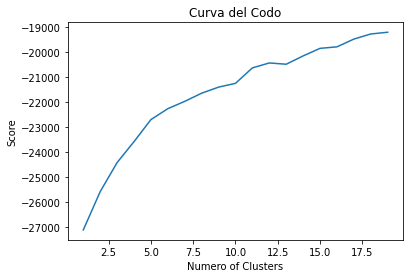

In [ ]:
# Obtener el numero de clusters optimo
# Diagrama del "Codo"
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_tfidf).score(X_tfidf) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero of Clusters')
plt.ylabel('Score')
plt.title('Curva del Codo')
plt.show()

# Interpretacion:
# Se observa que aprox. para n = 5 clusters hay un cambio significativo en la curva

In [ ]:
# Normalizacion de Vectores Característicos de TF-iDF (para algoritmo K-Means)
scaler = StandardScaler()  
scaler.fit(X_tfidf)
X_tfidf = scaler.transform(X_tfidf)

In [ ]:
X_tfidf

array([[-0.13683395, -0.21635685, -0.19292752, ..., -0.14136033,
        -0.13042878, -0.14129014],
       [-0.13683395, -0.21635685, -0.19292752, ..., -0.14136033,
        -0.13042878, -0.14129014],
       [-0.13683395, -0.21635685, -0.19292752, ..., -0.14136033,
        -0.13042878, -0.14129014],
       ...,
       [-0.13683395, -0.21635685, -0.19292752, ..., -0.14136033,
        -0.13042878, -0.14129014],
       [-0.13683395, -0.21635685, -0.19292752, ..., -0.14136033,
        -0.13042878, -0.14129014],
       [10.09778092, -0.21635685, -0.19292752, ..., -0.14136033,
        -0.13042878, -0.14129014]])

In [ ]:
X_tfidf[0]

array([-0.13683395, -0.21635685, -0.19292752, -0.1784904 , -0.14635205,
       -0.13954841, -0.14962694, -0.1733607 , -0.18224177, -0.27637185,
       -0.15027876,  2.35506618, -0.13670915, -0.33410071, -0.13078895,
       -0.17664164, -0.17427528, -0.14875399, -0.13665387, -0.13209982,
       -0.19434238, -0.14028389, -0.17166303, -0.18871136,  3.42967158,
       -0.15120883, -0.15109604, -0.20469035, -0.13101281, -0.15354259,
       -0.15849088, -0.25792374, -0.13570452, -0.19104765, -0.20332292,
       -0.14273792, -0.16027854, -0.13348027,  1.70391023, -0.18040189,
       -0.13511205, -0.14158772, -0.1879388 , -0.12911307, -0.14371263,
       -0.14263894,  6.93982469, -0.15027408, -0.1407917 , -0.13269779,
        3.09959852, -0.1601068 , -0.16785779, -0.13294717, -0.1582684 ,
       -0.14649979, -0.13387277, -0.25548763, -0.25144711, -0.19224776,
       -0.15801747, -0.13632619, -0.2057862 , -0.14859786, -0.22036366,
       -0.59189293, -0.15723469, -0.20373122, -0.18130739, -0.13

In [ ]:
# Crear modelo K-Means
labels , modelo = CrearKMeans(5,X_tfidf)

#### 5.1.3 Usando Vector Característico (FV) de Word2Vec como variables predictoras

In [ ]:
X_w2v = np.asarray(df_tweets_mod['FV_w2v'])

In [ ]:
X_w2v.shape

(29632,)

In [ ]:
X_w2v[0]

array([-0.04244221,  0.01580939, -0.01184985,  0.1964643 ,  0.29816017,
        0.11597991,  0.05425843,  0.22663019,  0.18609875, -0.02828736,
        0.0551599 , -0.03810175,  0.0900327 ,  0.28438051, -0.19695885,
       -0.11413636, -0.20145231, -0.21200547,  0.17019854,  0.03571349,
       -0.1331849 , -0.10156545, -0.10653409, -0.10254296,  0.00687075,
       -0.02094606,  0.20037455, -0.39214928,  0.01721273, -0.30180263,
        0.10223855,  0.1150964 ,  0.22969117, -0.10228719, -0.0914593 ,
       -0.09915259,  0.06013263, -0.01765584, -0.02158321,  0.1027448 ,
       -0.08230202, -0.2122364 ,  0.18225137,  0.02363901,  0.04646444,
       -0.18601542,  0.16379744, -0.01861854, -0.01140954, -0.14681151,
        0.17291598,  0.01695567, -0.3894437 ,  0.07553284,  0.24434201,
        0.1827305 , -0.18470103, -0.12416698, -0.13384388, -0.27118045,
       -0.11750361, -0.08780462,  0.19744509,  0.06368177, -0.26547659,
        0.08278557,  0.03181093,  0.12961853,  0.01727669,  0.15

In [ ]:
# Crear modelo K-Means
labels , modelo = CrearKMeans(5,X_w2v)

## **5.2 Algoritmo LDA**

# **6. EVALUACIÓN**

# **7. DESPLIEGUE**